<a href="https://colab.research.google.com/github/Jaimish0513/24110091_sem3/blob/main/bigdata%20and%20cc%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Created:
        Date     Product     Category  Sales Customer_ID
0 2025-01-01      Jacket      Fashion   1493        C117
1 2025-01-01      Tablet  Electronics    621        C103
2 2025-01-01      Laptop  Electronics    134        C103
3 2025-01-01  Headphones  Electronics    170        C103
4 2025-01-01       Shoes      Fashion    277        C106


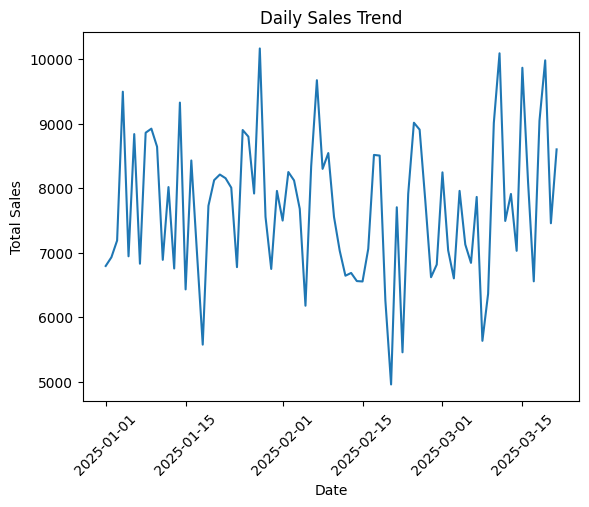

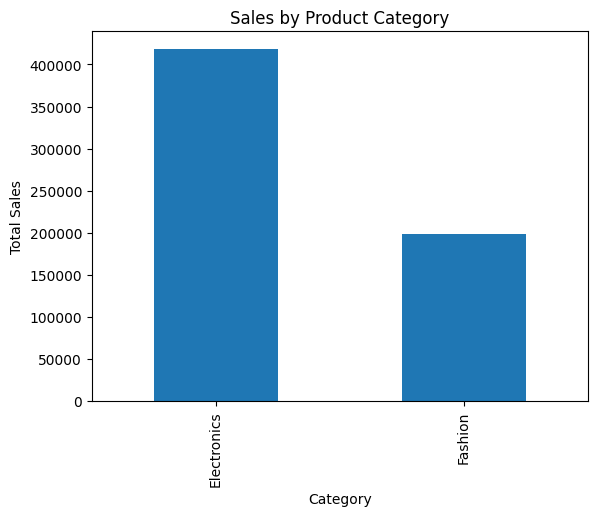

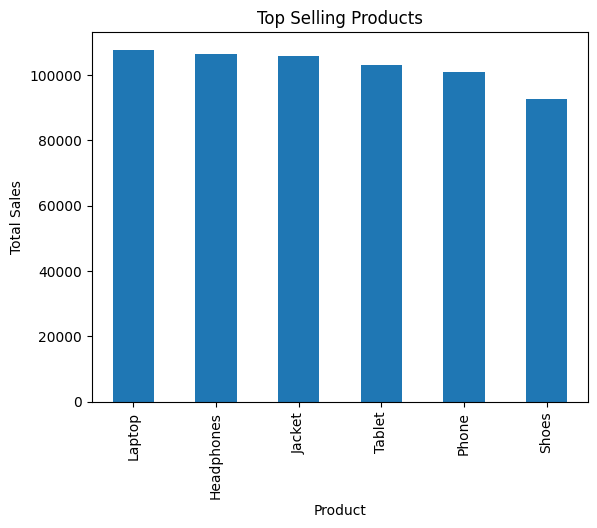

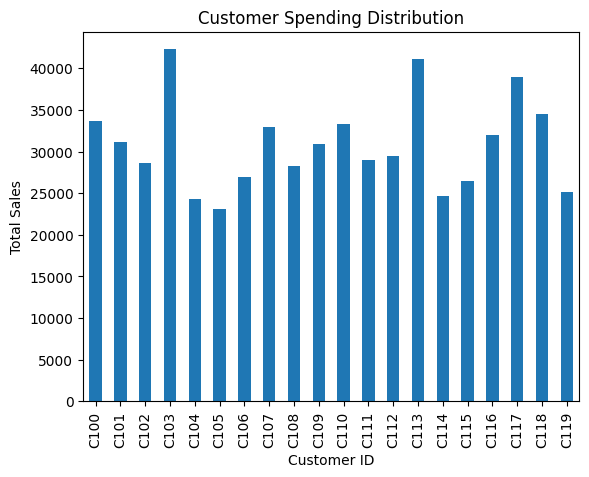

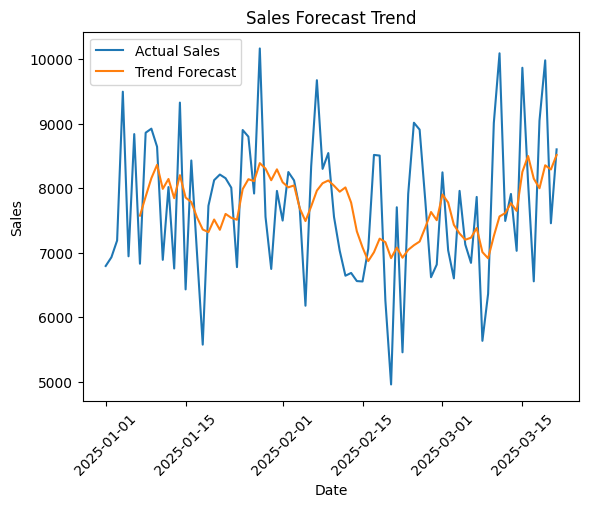

In [3]:
#RetailChain Big Data Analytics Project
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Generate Synthetic Retail Dataset

np.random.seed(44)

dates = pd.date_range(start="2025-01-01", periods=80)

products = ["Laptop","Phone","Headphones","Shoes","Jacket","Tablet"]
categories = {
    "Laptop":"Electronics",
    "Phone":"Electronics",
    "Headphones":"Electronics",
    "Shoes":"Fashion",
    "Jacket":"Fashion",
    "Tablet":"Electronics"
}

data = []

for date in dates:
    for i in range(10):  #for simulate multiple daily transactions
        product = np.random.choice(products)
        data.append([
            date,
            product,
            categories[product],
            np.random.randint(50,1500),
            "C" + str(np.random.randint(100,120))
        ])

df = pd.DataFrame(data, columns=["Date","Product","Category","Sales","Customer_ID"])

print("Dataset Created:")
print(df.head())

#part of Data Processing

df = df.sort_values("Date")
df = df.dropna()

#Daily Sales Trend exzmple:Graph1

daily_sales = df.groupby("Date")["Sales"].sum()

plt.figure()
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

#Category Performance ex:Graph2

category_sales = df.groupby("Category")["Sales"].sum()

plt.figure()
category_sales.plot(kind="bar")
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


#Top Selling Products Analysis

top_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False)

plt.figure()
top_products.plot(kind="bar")
plt.title("Top Selling Products")
plt.ylabel("Total Sales")
plt.show()

#6. Customer classification ex:Graph3

customer_value = df.groupby("Customer_ID")["Sales"].sum()

plt.figure()
customer_value.plot(kind="bar")
plt.title("Customer Spending Distribution")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.show()

#For Sales Forecasting ex:Graph4

daily_sales_df = daily_sales.reset_index()
daily_sales_df["Rolling_Average"] = daily_sales_df["Sales"].rolling(window=7).mean()

plt.figure()
plt.plot(daily_sales_df["Date"], daily_sales_df["Sales"], label="Actual Sales")
plt.plot(daily_sales_df["Date"], daily_sales_df["Rolling_Average"], label="Trend Forecast")
plt.legend()
plt.title("Sales Forecast Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()
